In [1]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

import mandelbrot_MC as mb
from mandelbrot_MC_solvers import PureRandomSampling, LatinHypercubeSampling, OrthogonalSampling

In [2]:
xRes = 500
yRes = 500

xVals = np.linspace(mb.XMIN, mb.XMAX, xRes)
yVals = np.linspace(mb.YMIN, mb.YMAX, yRes)

d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val


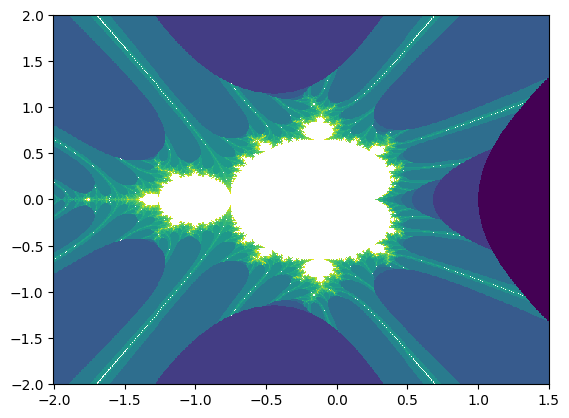

In [3]:
out = mb.mandelbrotDomain(xVals, yVals, 50, 2, 2)

fig, ax = plt.subplots()
ax.pcolormesh(xVals, yVals, out, norm=matplotlib.colors.LogNorm())
plt.show()

Area1=1.5777999999999999, Area2=1.4588


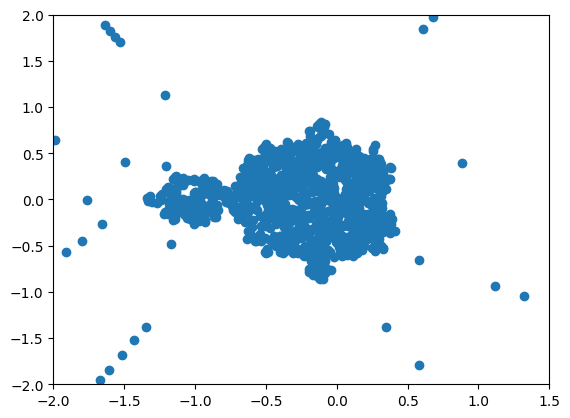

In [4]:
solver = PureRandomSampling()

nIter = 1000
nSamples = 10000

# Compare original implementation to OOP implementation
area1 = mb.mandelbrotArea(nIter, nSamples)
area2, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
ax.set_xlim(mb.XMIN, mb.XMAX)
ax.set_ylim(mb.YMIN, mb.YMAX)
print(f"Area1={area1}, Area2={area2}")
plt.show()

Area=1.4826


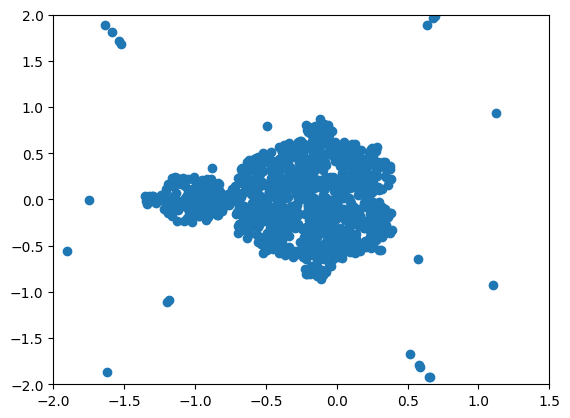

In [5]:
solver = LatinHypercubeSampling()

nIter = 1000
nSamples = 10000

# Compare original implementation to OOP implementation
area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
ax.set_xlim(mb.XMIN, mb.XMAX)
ax.set_ylim(mb.YMIN, mb.YMAX)
print(f"Area={area}")
plt.show()

In [6]:
maxIter = 500
maxSamples = 5000
minIter = 50
minSamples = 500
iterStepSize = 10
sampleStepSize = 100

solver = PureRandomSampling()

samples = np.arange(minSamples, maxSamples+1, sampleStepSize)
iterations = np.arange(minIter, maxIter+1, iterStepSize)

errorI_out = solver.iterate_iterSamples_Error(iterations, samples)

fig, ax = plt.subplots()
im = ax.pcolormesh(samples, iterations, errorI_out, norm=matplotlib.colors.LogNorm())
ax.set_xlabel("Samples")
ax.set_ylabel("Iterations")
ax.set_title("Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

KeyboardInterrupt: 